# Optimizing a Healthcare Network for Improved Service Delivery


## Business Problem:
Healthcare networks often face the challenge of optimizing the allocation of resources, particularly staff, across various facilities. Uneven distribution of healthcare staff can lead to inefficient service delivery, resulting in overburdened staff in some areas and underutilized resources in others. The goal is to ensure that each healthcare facility has the right number of staff based on the population they serve, while also considering geographic proximity for effective collaboration and patient transfers.

## Solution Approach:
In this project, we tackle the problem by first gathering population data from specific zip codes in Washington state and analyzing the staff-to-patient ratios across healthcare facilities in different areas. Using this data, we redistribute staff according to the population percentage in each region, ensuring a balanced and efficient workforce allocation. Furthermore, we calculate the distances between healthcare facilities using geolocation data and visualize the proximity between them with the help of Folium maps.

By optimizing staff distribution based on population needs and visualizing the geographic layout, the healthcare network can make informed decisions about resource allocation and reduce inefficiencies in service delivery.


<a id='toc'></a>
## Table of Content:

[1. Data Gathering](#l1)<br>
[2. Data Understanding](#l2)<br>
[3. Data Cleaning](#l3)<br>
[4. Data Manipulation](#l4)<br>
[5. Optimization](#l5)<br>
>[5.1. Coded Solution of the Problem](#l5.1)<br>
[5.2 Final Result](#l5.2)<br>
[5.3 Finding distance from each area to other area](#l5.3)<br>
[5.4 Visualizing Distances Using Folium map](#l5.4)<br>

[Conclusion](#conclusion)<br>

<a id='l1'></a>
## 1. Data Gathering: 
Read table from Washington Demographics and make its data frame.

In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Set headers to mimic a request from a browser
headers = {'User-Agent': 'Mozilla/5.0'}

# Fetch the webpage content
url = 'https://www.washington-demographics.com/zip_codes_by_population'
response = requests.get(url, headers=headers)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all the tables in the webpage
tables = pd.read_html(str(soup))

# Check if any tables were found
if len(tables) > 0:
    # Access the first table
    population_df = tables[0]
    print(population_df.head())
else:
    print("No tables found on the page.")


  Rank Zip Code Population
0    1    99301      85210
1    2    98052      77324
2    3    98012      75555
3    4    98682      66821
4    5    98208      60723


In [14]:
population_df = df
population_df.head()

,Rank,Zip Code,Population
0,1,99301,85210
1,2,98052,77324
2,3,98012,75555
3,4,98682,66821
4,5,98208,60723


[Table of Content](#toc)

<a id='l2'></a>
## 2. Data Understanding: 
Understand the gathered data with different pandas method.

In [15]:
# check the shape of dataframe
population_df.shape

(596, 3)

In [16]:
# check the dimension of dataframe
population_df.ndim

2

In [17]:
# check the datatypes of dataframe's columns
population_df.dtypes

Rank          object
Zip Code      object
Population    object
dtype: object

In [18]:
# check dataframe columns
population_df.columns

Index(['Rank', 'Zip Code', 'Population'], dtype='object')

In [19]:
# check dataframes statistical summery
population_df.describe()

,Rank,Zip Code,Population
count,596,596,596
unique,576,596,576
top,476 TIE,99301,568
freq,3,1,3


In [20]:
# check 1st 5 rows of dataframe
population_df.head()

,Rank,Zip Code,Population
0,1,99301,85210
1,2,98052,77324
2,3,98012,75555
3,4,98682,66821
4,5,98208,60723


[Table of Content](#toc)

<a id='l3'></a>
## 3. Data Cleaning:
Clean data for the manipulation purpose.

In [21]:
population_df.tail()

,Rank,Zip Code,Population
591,592,99136,17
592,593,99020,15
593,594,98353,14
594,595,98544,7
595,United States Census Bureau. B01001 SEX BY AGE...,United States Census Bureau. B01001 SEX BY AGE...,United States Census Bureau. B01001 SEX BY AGE...


In [22]:
# Now we delete last row which is just the description of the table
population_df = population_df.drop([563], axis=0)

In [23]:
population_df.tail()

,Rank,Zip Code,Population
591,592,99136,17
592,593,99020,15
593,594,98353,14
594,595,98544,7
595,United States Census Bureau. B01001 SEX BY AGE...,United States Census Bureau. B01001 SEX BY AGE...,United States Census Bureau. B01001 SEX BY AGE...


In [25]:
population_df = population_df[:594]

In [27]:
# Convert Population column into type int
population_df = population_df.astype({"Population": int})

In [28]:
population_df['Population'].dtypes

dtype('int64')

In [29]:
# Now we delete the column "Washington Zip codes by Population rank', becuse it is unncessary here
population_df.drop(["Rank"], axis = 1, inplace = True)

In [30]:
population_df.head()

,Zip Code,Population
0,99301,85210
1,98052,77324
2,98012,75555
3,98682,66821
4,98208,60723


[Table of Content](#toc)

<a id='l4'></a>
## 4. Data Manipulation:
Now manipulate the data for the desired solution.

In [31]:
# Its time to extract only the information of those area that is given in the document, so we make a new df
df1 = population_df[population_df['Zip Code'].isin(['98007','98290','98065','98801','98104']) ]
df1

,Zip Code,Population
30,98801,44801
45,98290,39873
114,98007,27571
193,98065,15960
200,98104,15052


In [32]:
# reset the index of new df
df1 = df1.reset_index(drop=True)
df1

,Zip Code,Population
0,98801,44801
1,98290,39873
2,98007,27571
3,98065,15960
4,98104,15052


In [33]:
# make dataframe that is given in the document
facility_id = ['A','B','C','D','E']
facility_area_zip_code = ['98007','98290','98065','98801','98104'] 
facility_staff_count = [21, 52, 43, 9, 64]
df2 = pd.DataFrame({'Facility ID': facility_id,
                         'Zip Code': facility_area_zip_code,
                          'Facility Staff Count': facility_staff_count
                        })
df2

,Facility ID,Zip Code,Facility Staff Count
0,A,98007,21
1,B,98290,52
2,C,98065,43
3,D,98801,9
4,E,98104,64


In [34]:
# merge both dataframes df1 & df2 in which same column is Zip code
facilities = pd.merge(df2, df1, on = 'Zip Code')
facilities

,Facility ID,Zip Code,Facility Staff Count,Population
0,A,98007,21,27571
1,B,98290,52,39873
2,C,98065,43,15960
3,D,98801,9,44801
4,E,98104,64,15052


In [35]:
# Set the order of above dataframe
facilities = facilities[['Facility ID', 'Zip Code', 'Population', 'Facility Staff Count']]
facilities

,Facility ID,Zip Code,Population,Facility Staff Count
0,A,98007,27571,21
1,B,98290,39873,52
2,C,98065,15960,43
3,D,98801,44801,9
4,E,98104,15052,64


### Now our data is completely ready for finding the solution of the given problem

[Table of Content](#toc)

<a id='l5'></a>
## 5. Optimization

<a id='l5.1'></a>
### 5.1 Coded Solution of the Problem

First of all, we'll find a current healthcare worker to patient ratio.

In [36]:
facilities['Healthcare worker to patient ratio'] = facilities['Population']/ facilities['Facility Staff Count']
facilities

/var/folders/8j/w4cf450n1sscq6nksr6976b40000gn/T/ipykernel_23826/2556213488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facilities['Healthcare worker to patient ratio'] = facilities['Population']/ facilities['Facility Staff Count']


,Facility ID,Zip Code,Population,Facility Staff Count,Healthcare worker to patient ratio
0,A,98007,27571,21,1312.904762
1,B,98290,39873,52,766.788462
2,C,98065,15960,43,371.162791
3,D,98801,44801,9,4977.888889
4,E,98104,15052,64,235.187500


In [37]:
# change "Healthcare worker to patient ratio" col into integer data type
facilities = facilities.astype({"Healthcare worker to patient ratio": int})
facilities

,Facility ID,Zip Code,Population,Facility Staff Count,Healthcare worker to patient ratio
0,A,98007,27571,21,1312
1,B,98290,39873,52,766
2,C,98065,15960,43,371
3,D,98801,44801,9,4977
4,E,98104,15052,64,235


Here we can see that all facilities in the above table having good Healthcare worker to patient ratios except facility D, so now we write the code to shift enough healthcare workers into those places where they are less in quantity.


We shift the number of staff into different facilities according to the percentage of the population.

In [38]:
# find percentage of the population of each area 
population_percentage_in_area = []
total_population = facilities['Population'].sum()
total_staff = facilities['Facility Staff Count'].sum()
for i in facilities['Population']:
    p = (i / total_population) * 100
    population_percentage_in_area.append(p)
    
# convert number of staff according to the population percentage in each area

staff1 = []
for i in facilities.index:
    s = (population_percentage_in_area[i] * total_staff) / 100
    staff1.append(round(s))


In [39]:
# Display Population Percantage in each area & converted staff according to it
print(population_percentage_in_area)
print(staff1)

[19.245830919257003, 27.833194887509862, 11.1408168536267, 31.27316640722617, 10.506990932380269]
[36, 53, 21, 59, 20]


Now make both of the above entities as a part of the data frame.

In [40]:
new_facility_with_updated_staff = facilities.drop(['Facility Staff Count', 'Healthcare worker to patient ratio'], axis = 1)
new_facility_with_updated_staff['New Staff Count'] = staff1
new_facility_with_updated_staff['New Healthcare worker to patient ratio'] = round(new_facility_with_updated_staff['Population'] / new_facility_with_updated_staff['New Staff Count'])
new_facility_with_updated_staff

,Facility ID,Zip Code,Population,New Staff Count,New Healthcare worker to patient ratio
0,A,98007,27571,36,766.0
1,B,98290,39873,53,752.0
2,C,98065,15960,21,760.0
3,D,98801,44801,59,759.0
4,E,98104,15052,20,753.0


Now we create a data frame that also has area column(having the complete address of area).

In [41]:
# install geopy
! pip install geopy

zsh:1: command not found: pip


In [46]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Provide a custom user-agent string
geolocator = Nominatim(user_agent="my_custom_application")

area = []

# Function to handle geocoding with error handling
def get_location(zip_code):
    try:
        # Attempt to geocode the given ZIP code
        location = geolocator.geocode(zip_code, timeout=10)
        return location.address if location else None
    except GeocoderTimedOut:
        # Handle timeout case
        return "Geocoder Timed Out"

# Loop through the ZIP codes and fetch addresses
for i in new_facility_with_updated_staff['Zip Code']:
    area.append(get_location(i))

# Add the 'Area' column to the DataFrame
new_facility_with_updated_staff['Area'] = area
new_facility_with_updated_staff


,Facility ID,Zip Code,Population,New Staff Count,New Healthcare worker to patient ratio,Area
0,A,98007,27571,36,766.0,"98007, Bellevue, King County, Washington, Unit..."
1,B,98290,39873,53,752.0,"98290, Snohomish County, Washington, United St..."
2,C,98065,15960,21,760.0,"98065, Montalbano Elicona, Messina, Sicilia, I..."
3,D,98801,44801,59,759.0,"98801, Wenatchee, Chelan County, Washington, U..."
4,E,98104,15052,20,753.0,"98104, Didieji Rūšupiai, Skuodo seniūnija, Sku..."


[Table of Content](#toc)

<a id='l5.2'></a>
### 5.2 Final Result

In [47]:
# arrange the columns of df
new_facility_with_updated_staff = new_facility_with_updated_staff[['Facility ID', 'Zip Code', 'Area', 'Population', 'New Staff Count', 'New Healthcare worker to patient ratio']]
new_facility_with_updated_staff

,Facility ID,Zip Code,Area,Population,New Staff Count,New Healthcare worker to patient ratio
0,A,98007,"98007, Bellevue, King County, Washington, Unit...",27571,36,766.0
1,B,98290,"98290, Snohomish County, Washington, United St...",39873,53,752.0
2,C,98065,"98065, Montalbano Elicona, Messina, Sicilia, I...",15960,21,760.0
3,D,98801,"98801, Wenatchee, Chelan County, Washington, U...",44801,59,759.0
4,E,98104,"98104, Didieji Rūšupiai, Skuodo seniūnija, Sku...",15052,20,753.0


#### This is the approximate staff count that is distributed/ allocated according to population percentage in each area.

[Table of Content](#toc)

<a id='l5.3'></a>
### 5.3 Finding the distance from each area to other areas

##### Now its time to find the distance from each area to other areas.
To perform this task, we use geopy library. It is a python library that makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

In [49]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="my_custom_application")

In [51]:
# import geodesic module for finding distance between 2 locations
from geopy.distance import geodesic
iterator = len(new_facility_with_updated_staff.index)

distance_in_miles = []
distance_in_km = []
each_area = []
other_area = []

# find distance from each area to another area and store their result in the above lists
for i in range(iterator):
    location_a = geolocator.geocode(new_facility_with_updated_staff['Zip Code'][i]) 
    area1 = new_facility_with_updated_staff['Facility ID'][i]
    a_lat = location_a.latitude
    a_long = location_a.longitude
    point_a = (a_lat, a_long)
    
    for j in range(i+1, iterator):
        location_b = geolocator.geocode(new_facility_with_updated_staff['Zip Code'][j]) 
        b_lat = location_b.latitude
        b_long = location_b.longitude
        point_b = (b_lat, b_long)
        distance_miles = geodesic(point_a, point_b).miles 
        distance_in_miles.append(round(distance_miles,2))
        distance_km = geodesic(point_a, point_b).km 
        distance_in_km.append(round(distance_km,2))
        area2 = new_facility_with_updated_staff['Facility ID'][j]
        each_area.append(area1)
        other_area.append(area2)
        
        


In [52]:
# print all lists
print(each_area)
print(other_area)
print(distance_in_miles)
print(distance_in_km)

['A', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'D']
['B', 'C', 'D', 'E', 'C', 'D', 'E', 'D', 'E', 'E']
[22.19, 5974.13, 85.83, 4975.93, 5953.76, 88.04, 4954.15, 5937.96, 1297.06, 4957.26]
[35.72, 9614.44, 138.13, 8007.98, 9581.65, 141.68, 7972.94, 9556.22, 2087.41, 7977.94]


 Now we make a dataframe that shows distance between each area to every other area.

In [53]:
distance_df = pd.DataFrame({"Each Area": each_area,
                           "Other Area": other_area,
                           "Distance in Miles": distance_in_miles,
                           "Distance in Km": distance_in_km})

distance_df

,Each Area,Other Area,Distance in Miles,Distance in Km
0,A,B,22.19,35.72
1,A,C,5974.13,9614.44
2,A,D,85.83,138.13
3,A,E,4975.93,8007.98
4,B,C,5953.76,9581.65
5,B,D,88.04,141.68
6,B,E,4954.15,7972.94
7,C,D,5937.96,9556.22
8,C,E,1297.06,2087.41
9,D,E,4957.26,7977.94


In [54]:
# arrange all the columns
distance_df = distance_df[["Each Area", "Other Area", "Distance in Miles", "Distance in Km"]]
distance_df

,Each Area,Other Area,Distance in Miles,Distance in Km
0,A,B,22.19,35.72
1,A,C,5974.13,9614.44
2,A,D,85.83,138.13
3,A,E,4975.93,8007.98
4,B,C,5953.76,9581.65
5,B,D,88.04,141.68
6,B,E,4954.15,7972.94
7,C,D,5937.96,9556.22
8,C,E,1297.06,2087.41
9,D,E,4957.26,7977.94


Make a pivot table so data become easily readable. It takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [55]:
distance_df_km = distance_df[["Each Area", "Other Area", "Distance in Km"]]
distance_df_km

,Each Area,Other Area,Distance in Km
0,A,B,35.72
1,A,C,9614.44
2,A,D,138.13
3,A,E,8007.98
4,B,C,9581.65
5,B,D,141.68
6,B,E,7972.94
7,C,D,9556.22
8,C,E,2087.41
9,D,E,7977.94


In [56]:
# make pivot table for above data frame
distance_df_km_pivot = distance_df_km.pivot(index = "Each Area", columns = "Other Area")
distance_df_km_pivot

Distance in Km                           
Other Area              B        C        D        E
Each Area                                           
A                   35.72  9614.44   138.13  8007.98
B                     NaN  9581.65   141.68  7972.94
C                     NaN      NaN  9556.22  2087.41
D                     NaN      NaN      NaN  7977.94

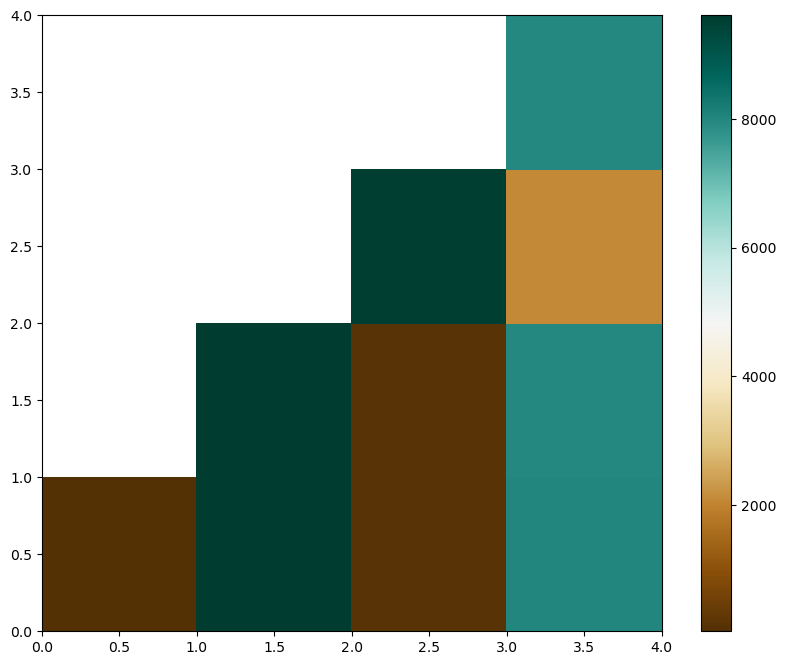

In [57]:
# visualize above pivot table as a heatmap
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.pcolor(distance_df_km_pivot, cmap = 'BrBG')
plt.colorbar()
plt.show()

In [58]:
# Make pivot table for making above df easy to read

distance_df_pivot = distance_df.pivot(index = "Each Area", columns = "Other Area")
distance_df_pivot

Distance in Miles                            Distance in Km  \
Other Area                 B        C        D        E              B   
Each Area                                                                
A                      22.19  5974.13    85.83  4975.93          35.72   
B                        NaN  5953.76    88.04  4954.15            NaN   
C                        NaN      NaN  5937.96  1297.06            NaN   
D                        NaN      NaN      NaN  4957.26            NaN   

                                       
Other Area        C        D        E  
Each Area                              
A           9614.44   138.13  8007.98  
B           9581.65   141.68  7972.94  
C               NaN  9556.22  2087.41  
D               NaN      NaN  7977.94

[Table of Content](#toc)

<a id='l5.4'></a>
### 5.4 Visualizing Distances Using Folium Map

Now we can easily read and visualize data.

##### Its time to install folium that is a powerful Python library that helps in creating several types of Leaflet maps.

In [63]:
pip install folium==0.5.0

  Preparing metadata (setup.py) ... done
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76117 sha256=bc6166b5111ae968195f9bb1126417e1ec58c908e668e0e81691d22b1ab47cc1
  Stored in directory: /Users/mgmanjusha/Library/Caches/pip/wheels/1a/47/db/10239d1cd6724bc127ba45d5877b2fc32eb421971c04a40f5f
Successfully built folium
Note: you may need to restart the kernel to use updated packages.


In [64]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [65]:
# Create map of zip code 98007
import folium
loc = geolocator.geocode("98007") 
#print((location.latitude, location.longitude)) 
world_map = folium.Map(location=[loc.latitude, loc.longitude], zoom_start=13)

# display world map
world_map

In [66]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
lat = loc.latitude
lng = loc.longitude
# loop through the 100 crimes and add each to the incidents feature group
incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='black',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
label = geolocator.geocode("98007").address
folium.Marker([lat, lng], popup=label).add_to(world_map)   
world_map.add_child(incidents)


To show distances from one area to other areas, we make df that contain facility id with its area coordinates.

In [67]:
latitudes = []
longitudes = []

for i in facility_area_zip_code:
    location = geolocator.geocode(i)
    lat = location.latitude
    latitudes.append(lat)
    lng = location.longitude
    longitudes.append(lng)


In [68]:
print(facility_id)
print(facility_area_zip_code)
print(latitudes)
print(longitudes)

['A', 'B', 'C', 'D', 'E']
['98007', '98290', '98065', '98801', '98104']
[47.60205545945946, 47.91922650247934, 38.023832219999996, 47.42625467880923, 56.2780165]
[-122.1443852827981, -122.06887529421486, 15.01312205, -120.32902324278824, 21.587284525]


In [69]:
area_with_coordinates = pd.DataFrame({"Facility Id":facility_id ,
                                     "Facility Area Zip Code": facility_area_zip_code,
                                     "Latitudes": latitudes,
                                     "Longitudes": longitudes})

area_with_coordinates

,Facility Id,Facility Area Zip Code,Latitudes,Longitudes
0,A,98007,47.602055,-122.144385
1,B,98290,47.919227,-122.068875
2,C,98065,38.023832,15.013122
3,D,98801,47.426255,-120.329023
4,E,98104,56.278016,21.587285


##### Start creating maps from one area to others

In [70]:
# map from facility id 'A' to 'B'
import folium 

my_map1 = folium.Map(location = [area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
zoom_start = 9) 

folium.Marker([area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][0]).add_to(my_map1) 

folium.Marker([area_with_coordinates['Latitudes'][1], area_with_coordinates['Longitudes'][1]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][1]).add_to(my_map1) 

# Add a line to the map by using line method . 
# it connect both coordiates by the line 
# line_opacity implies intensity of the line 

folium.PolyLine(locations = [(area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]), (area_with_coordinates['Latitudes'][1], area_with_coordinates['Longitudes'][1])], 
line_opacity = 0.5).add_to(my_map1) 

my_map1


In [71]:
# map from facility id 'A' to 'C'
my_map2 = folium.Map(location = [area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
zoom_start = 10) 

folium.Marker([area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][0]).add_to(my_map2) 

folium.Marker([area_with_coordinates['Latitudes'][2], area_with_coordinates['Longitudes'][2]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][2]).add_to(my_map2) 
folium.PolyLine(locations = [(area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]), (area_with_coordinates['Latitudes'][2], area_with_coordinates['Longitudes'][2])], 
line_opacity = 0.5).add_to(my_map2) 

my_map2


In [72]:
# map from facility id 'A' to 'D'
my_map3 = folium.Map(location = [area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
zoom_start = 8.3) 

folium.Marker([area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][0]).add_to(my_map3) 

folium.Marker([area_with_coordinates['Latitudes'][3], area_with_coordinates['Longitudes'][3]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][3]).add_to(my_map3) 
folium.PolyLine(locations = [(area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]), (area_with_coordinates['Latitudes'][3], area_with_coordinates['Longitudes'][3])], 
line_opacity = 0.5).add_to(my_map3) 

my_map3


In [73]:
# map from facility id 'A' to 'E'
my_map4 = folium.Map(location = [area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
zoom_start = 9) 

folium.Marker([area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][0]).add_to(my_map4) 

folium.Marker([area_with_coordinates['Latitudes'][4], area_with_coordinates['Longitudes'][4]], 
popup = "Facility Id: "+area_with_coordinates['Facility Id'][4]).add_to(my_map4) 

# Add a line to the map by using line method . 
# it connect both coordiates by the line 
# line_opacity implies intensity of the line 

folium.PolyLine(locations = [(area_with_coordinates['Latitudes'][0], area_with_coordinates['Longitudes'][0]), (area_with_coordinates['Latitudes'][4], area_with_coordinates['Longitudes'][4])], 
line_opacity = 0.5).add_to(my_map4) 

my_map4


We can create more distance maps same as above

<a id='conclusion'></a>
## Conclusion:
So in this project, we modeled the number of staff members needed in each area depending on the level of care & rule of thumb. Furthermore, we found the distances from each area to other areas and then we created leaflet maps of those distances with folium library.